## <군집분석>

## 1. 계층적 군집분석
n개의 군집으로 시작해 점차 군집의 개수를 줄여나가는 방법이다.
군집의 거리를 계산하는 방법에 따라 사용하는 연결법이 달라지며 모든 연결법은 거리행렬을 통해 가까운 거리의 객체들 관계를 규명하고 군집의 개수를 선택 / 기준이되는 컬럼(x축이될 컬럼)이 unique해야함

- 최단연결법(method=single) : 각각의 군집이 가지고 있는 객체의 수가 비슷하지 않아 군집을 해석하기에 어려움이 있음.
- 최장연결법(method=comlete)
- 평균연결법(method=average)
- 중심연결법(method=centroid)
- 와드연결법(method=ward) : 데이터의 크기가 너무 크지 않을때

In [1]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from matplotlib import pyplot as plt

In [2]:
US=pd.read_csv("USArrests.csv")
US.columns=['State', 'Marder', 'Assault', 'UrbanPop', 'Rape']
labelList=US.State.tolist()
US.head()

,State,Marder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
single=linkage(US.iloc[:, 1::], metric='euclidean', method='single')

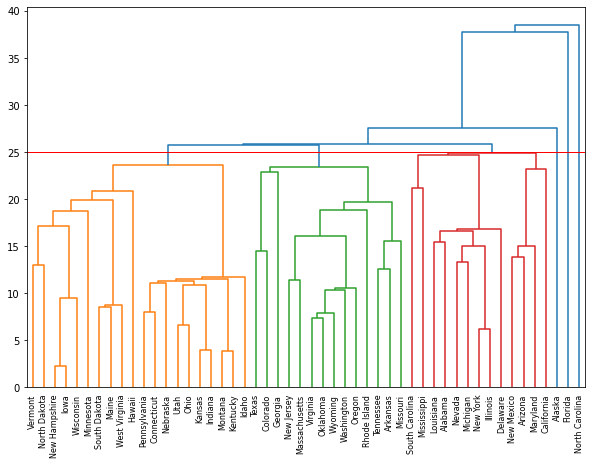

In [4]:
plt.figure(figsize=(10,7))
dendrogram(single, orientation='top', labels=labelList, distance_sort='descending', color_threshold=25, show_leaf_counts=True)
plt.axhline(y=25, color='r', linewidth=1)
plt.show()

## 1-2. 와드연결법(ward)

In [5]:
ward=linkage(US.iloc[:, 1::], metric='euclidean', method='ward')

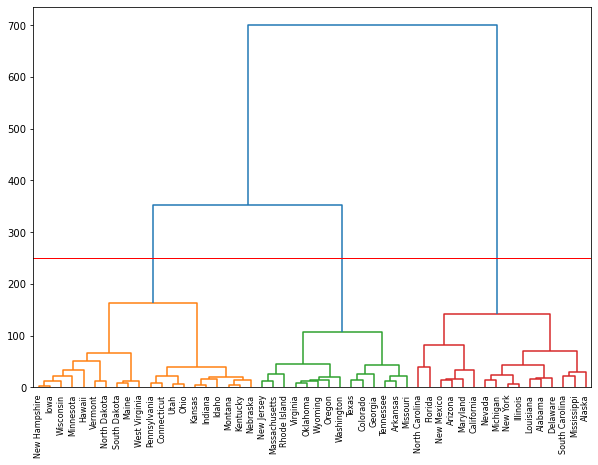

In [6]:
plt.figure(figsize=(10,7))
dendrogram(ward, orientation='top', labels=labelList, distance_sort='descending', color_threshold=250)
plt.axhline(y=250, color='r', linewidth=1)
plt.show()

In [7]:
#state(주)마다 어떤 군집에 설정되었는지 확인
assignments=fcluster(ward, 250, 'distance')
assignments

array([1, 1, 1, 2, 1, 2, 3, 1, 1, 2, 3, 3, 1, 3, 3, 3, 3, 1, 3, 1, 2, 1,
       3, 1, 2, 3, 3, 1, 3, 2, 1, 1, 1, 3, 3, 2, 2, 3, 2, 1, 3, 2, 2, 3,
       3, 2, 2, 3, 3, 2], dtype=int32)

In [8]:
US['cluster']=assignments
US.groupby('cluster').mean()

,Marder,Assault,UrbanPop,Rape
cluster,,,,
1,11.812500,272.562500,68.312500,28.375000
2,8.214286,173.285714,70.642857,22.842857
3,4.270000,87.550000,59.750000,14.390000


## 2. 비계층적 군집분석
계층적 군집분석은 덴드로그램을 보고 적절한 군집의 수를 직접 판단해야 했다. 반편 비계층적 군집분석은 순차적으로 군집화되는 것이 아닌, 랜덤하게 군집을 묶어가는 알고리즘이 사용된다.

1. k-means clustering : 군집 중심점이라는 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법
<장점> 
- 일반적인 군집화에서 가장많이 사용
- 알고리즘이 쉽고 간결
<단점>
- 속성 개수가 많을 경우 군집화 정확도가 떨어짐
- 반복수행을 하는데 반복횟수가 많을 경우 수행 시간이 느려짐
- 사전에 군집 개수 선택을 가이드하기 어려움


2. DBSCAN : 

## 2-1. k-means clustering(KMeans)

In [9]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris=load_iris()
irisDF=pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


- 초기 k값을 지정, 하라바츠 스코어/엘보우기법을 통한 탐색

In [10]:
# 하바라츠 스코어가 가장 높을 경우는 k=3일때 -> 엘보우로 더 확인해보기
from sklearn.metrics import calinski_harabasz_score
for k in range(2,10):
    kmeans_model=KMeans(n_clusters=k, random_state=1).fit(irisDF)
    labels=kmeans_model.labels_
    print(calinski_harabasz_score(irisDF, labels))

513.9245459802768
561.62775662962
530.4871420421675
495.54148767768777
473.5154538824768
443.84523107907245
440.59767319067873
407.0468400265113


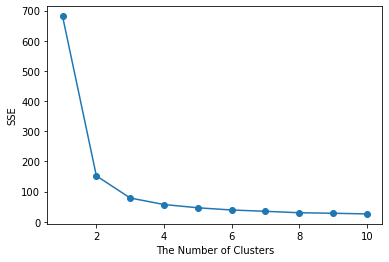

[681.3706, 152.34795176035792, 78.85144142614601, 57.25600931571816, 46.44618205128205, 39.066035353535355, 34.72327762923351, 29.990426406926403, 28.27867471563524, 26.094089542638304]


In [11]:
import matplotlib.pyplot as plt
def elbow(X):
    sse=[]
    for i in range(1,11):
        km=KMeans(n_clusters=i, random_state=1)
        km.fit(X)
        sse.append(km.inertia_)
        
    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('The Number of Clusters')
    plt.ylabel('SSE')
    plt.show()
    print(sse)

elbow(irisDF)

- 2-3으로 갈 때 기울기 소실이 발생하므로 2-3개의 군집이 적절한 것을 확인할 수 있다.
- k=3로 지정하여 최종 군집분석 진행

In [12]:
km=KMeans(n_clusters=3, random_state=0)
km.fit(irisDF)
print(km.labels_)
irisDF['cluster']=km.labels_

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


## 군집 평가(실루엣 계수) : 응집도, 분리도 차원에서
실루엣 계수가 1로 가까워질수록 근처의 군집과 더 멀리 떨어져있다는 것

In [13]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [14]:
#silhouette_samples(X컬럼, cluster) : 개별 실루엣 계수
score_samples=silhouette_samples(iris.data, irisDF['cluster'])
print(score_samples.shape)
irisDF['silhouette']=score_samples

(150,)


In [15]:
#silhouette_score(X컬럼, cluster) : 평균 실루엣 계수
average_score=silhouette_score(iris.data, irisDF['cluster'])
average_score

0.5528190123564095

In [16]:
irisDF.groupby('cluster')['silhouette'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette, dtype: float64

In [17]:
irisDF['cluster'].value_counts()

0    62
1    50
2    38
Name: cluster, dtype: int64

## 차원 축소 후 군집분석 시각화 

In [18]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_transformed=pca.fit_transform(iris.data)
irisDF['pca_x']=pca_transformed[:, 0]
irisDF['pca_y']=pca_transformed[:, 1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette,pca_x,pca_y
0,5.1,3.5,1.4,0.2,1,0.852955,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,1,0.815495,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,1,0.829315,-2.888991,-0.144949


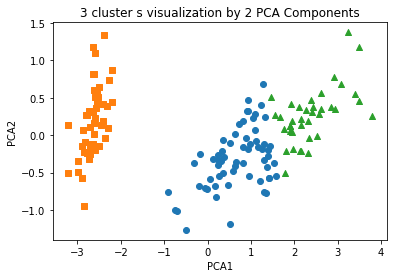

In [19]:
#군집 값이 0,1,23인 경우마다 별도의 인덱스로 추출
marker0_ind=irisDF[irisDF['cluster']==0].index
marker1_ind=irisDF[irisDF['cluster']==1].index
marker2_ind=irisDF[irisDF['cluster']==2].index

#군집 값 0,1,2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. p,s,^로 마커표시
plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind,'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind,'pca_y'], marker='^')

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('3 cluster s visualization by 2 PCA Components')
plt.show()

각각의 클러스터들이 다른 군집과 잘 분리되어있음을 확인

## 군집분석 시각화2

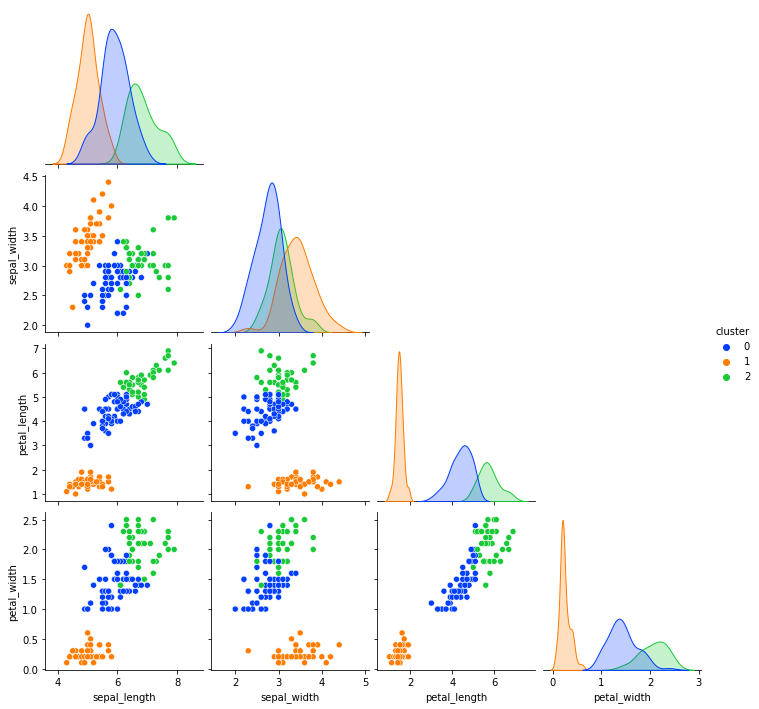

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
irisDF=irisDF.drop(columns=['pca_y', 'pca_x', 'silhouette'])
sns.pairplot(irisDF, diag_kind='kde', hue='cluster', corner=True, palette='bright')
plt.show()

## <차원축소> -> StandardScaler(표준화) 진행

## 1. PCA(주성분 분석)
- 분산이 데이터의 특성을 가장 잘 나타내는 것으로 간주하여 데이터 변동성이 가장 큰 방향으로 축을 생성하고 새롭게 생성된 축으로 데이터를 투영하는 방식
- 여러 변수들의 변량을 주성분이라는 서로 상관관계가 높은 변수들의 선형 결합으로 만들어 변수를 요약 및 축소하는 기법
- 다중공선성이 존재하는 경우, 상관성이 적은 주성분으로 변수들을 축소

In [21]:
import pandas as pd
data=pd.read_csv('mtcars.csv')
data.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaled_df=scaler.fit_transform(data.iloc[:, 1:])

pca=PCA(n_components=4)
pca.fit(scaled_df)

#네개의 주성분으로 압축된 컬럼
comp=pca.transform(scaled_df)
pca_df=pd.DataFrame(comp, columns=['주성분1', '주성분2', '주성분3', '주성분4'], index=data.iloc[:, 0])
pca_df.head()

,주성분1,주성분2,주성분3,주성분4
Unnamed: 0,,,,
Mazda RX4,0.657213,1.735446,-0.601199,0.115522
Mazda RX4 Wag,0.629396,1.550033,-0.382322,0.202307
Datsun 710,2.779397,-0.146457,-0.241238,-0.249139
Hornet 4 Drive,0.311771,-2.363019,-0.135759,-0.511862
Hornet Sportabout,-1.974489,-0.754402,-1.134402,0.075653


In [23]:
#각 컬럼의 기여도(?)
loadings=pd.DataFrame(pca.components_.T, columns=['주성분1', '주성분2', '주성분3', '주성분4'], index=data.columns[1:])
loadings

,주성분1,주성분2,주성분3,주성분4
mpg,0.362531,0.016124,-0.225744,-0.022540
cyl,-0.373916,0.043744,-0.175311,-0.002592
disp,-0.368185,-0.049324,-0.061484,0.256608
hp,-0.330057,0.248784,0.140015,-0.067676
drat,0.294151,0.274694,0.161189,0.854829
wt,-0.346103,-0.143038,0.341819,0.245899
qsec,0.200456,-0.463375,0.403169,0.068077
vs,0.306511,-0.231647,0.428815,-0.214849
am,0.234943,0.429418,-0.205767,-0.030463
gear,0.206916,0.462349,0.289780,-0.264691


In [24]:
std=pd.DataFrame(pca_df.std()).T
pca_summary=pd.concat([std, pd.DataFrame(pca.explained_variance_ratio_).set_index(std.columns).T])
pca_summary

,주성분1,주성분2,주성분3,주성분4
0,2.611814,1.654076,0.804630,0.527536
0,0.600764,0.240952,0.057018,0.024509


In [25]:
import numpy as np

#누적변동성비율 계산
proportion=pca.explained_variance_ratio_
s=0
result=[]
for i in range(len(proportion)):
    s=s+proportion[i]
    result.append(np.round(s,4))

#index명 1
pca_summary.loc[1]=result

In [26]:
pca_summary.index=['표준편차', '변동량', '누적변동량']
pca_summary
#주성분 1,2만으로 전체 변동의 84%를 설명할 수 있다.

,주성분1,주성분2,주성분3,주성분4
표준편차,2.611814,1.654076,0.804630,0.527536
변동량,0.600764,0.240952,0.057018,0.024509
누적변동량,0.600800,0.841700,0.898700,0.923200


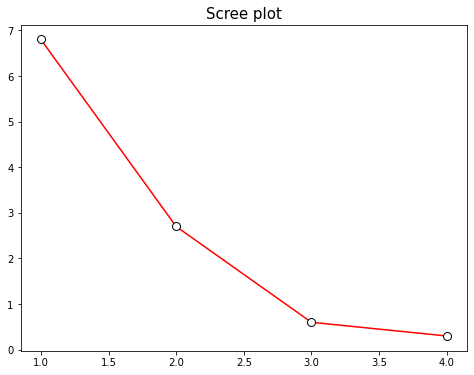

In [27]:
#Scree plot
import matplotlib.pyplot as plt
%matplotlib inline

per_var=np.round(pca.explained_variance_, decimals=1)
labels=['주성분'+str(x) for x in range(1, len(per_var)+1)]

plt.figure(figsize=(8,6))
plt.title('Scree plot', fontsize=15)
plt.plot(range(1,5), per_var, marker='o', markerfacecolor='w', markersize=8, markeredgecolor='k', color='r')
plt.show()

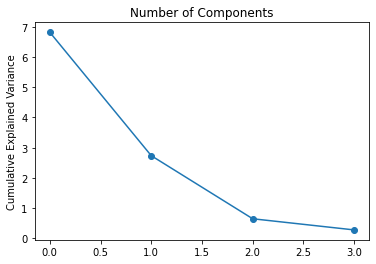

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.title('Scree plot')
plt.title('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.plot(pca.explained_variance_, 'o-')
plt.show()

팔꿈치 그림은 주성분이 3개일 때 팔꿈치 모양 존재

In [29]:
def biplot(score, coeff, labels=None, index=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    
    plt.figure(figsize=(12,9))
    plt.scatter(xs * scalex, ys * scaley, s=5)
    
    for i in range(n):
        plt.arrow(0,0,coeff[i,0], coeff[i,1], color='r', alpha=0.5, head_width=0.01)
        if labels is None:
            plt.text(coeff[i,0]*1.15, coeff[i,1], 'Var'+str(i+1), color='green', ha='center', va='center')
            
        else:
            plt.text(coeff[i,0]*1.15, coeff[i,1]*1.15, labels[i], color='g', ha='center', va='center')
            
    for i in range(score.shape[0]):
        if index is None:
            plt.text((xs*scalex)[i], (ys*scaley)[i], str[i])
            
        else:
            plt.text((xs*scalex)[i], (ys*scaley)[i], index[i])
            
    plt.title('PCA - Biplot', fontsize=15)
    plt.xlabel('Comp. {}'.format(1))
    plt.ylabel('Comp. {}'.format(2))
    plt.grid()

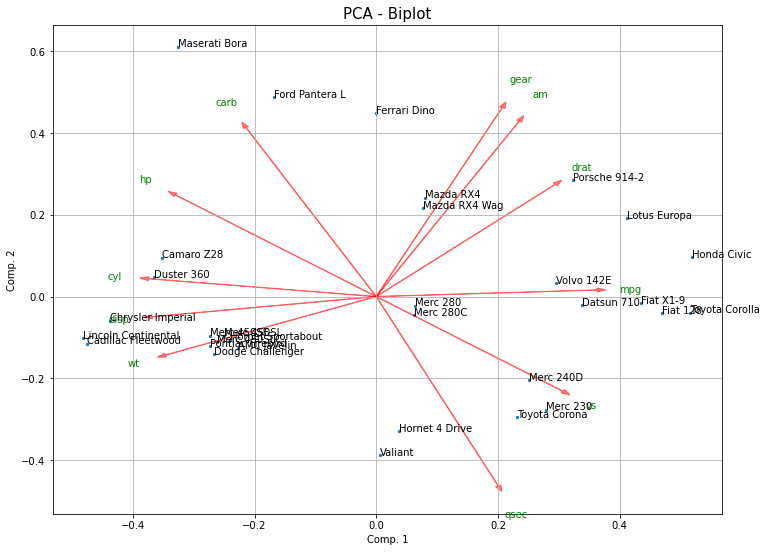

In [30]:
biplot(comp, np.transpose(pca.components_), labels=data.columns[1:], index=data.iloc[:,0])

화살표의 길이가 길수록 원변수의 분산을 잘 설명하는 변수라고 할 수 있다.
화살표는 원변수와 pc의 상관계수를 뜻하며 pc와 평행할수록 해당 pc에 큰 영향

## 2. LDA
- 지도학습의 분류에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원을 축소함
- 입력 데이터의 결정값 클래스를 최대한으로 분리할 수 있는 축을 찾는다.
- 클래스간 분산은 크게, 클래스 내부 분산은 작게 차원축소

In [31]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix

data=pd.DataFrame(load_iris().data, columns=load_iris().feature_names)
data['target']=load_iris().target

In [32]:
scaled_df=scaler.fit_transform(data.iloc[:, :-1])

In [33]:
lda=LinearDiscriminantAnalysis(n_components=2)
lda_iris=lda.fit_transform(scaled_df, data.target)

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

In [35]:
#원래 모델
gb=GradientBoostingClassifier(random_state=42)
score=cross_val_score(gb, data.iloc[:, :-1], data.target, scoring='accuracy', cv=5)
score.mean()

0.9600000000000002

In [36]:
#차원축소 후 모델
score=cross_val_score(gb, lda_iris, data.target, scoring='accuracy', cv=5)
score.mean()

0.96

Lda로 차원을 2차원으로 축소한 후 train/validation을 진행했는데 성능상 별차이가 없는 것을 확인했다.

항상 이렇지는 않음